In [252]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline

In [253]:
df = pd.read_csv("churn.csv")
#display(df.head(5))
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265,197,245,10,1,0,0,1,...,45,99,17,91,11,3,3,KS,415,382-4657
1,107,26,162,196,254,14,1,0,0,1,...,27,103,17,103,11,3,4,OH,415,371-7191
2,137,0,243,121,163,12,0,0,0,0,...,41,110,10,104,7,5,3,NJ,415,358-1921
3,84,0,299,62,197,7,2,0,1,0,...,51,88,5,89,9,7,2,OH,408,375-9999
4,75,0,167,148,187,10,3,0,1,0,...,28,122,13,121,8,3,3,OK,415,330-6626


In [254]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  3333


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Count of values,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0


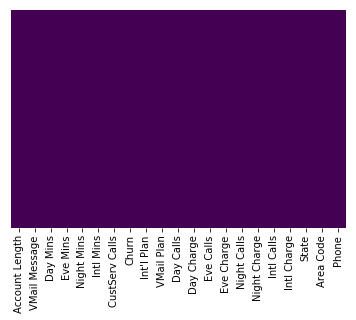

In [256]:
#comprovamos si hay missing values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [257]:
df.drop(["Phone", "Area Code", "State"], axis=1, inplace=True)
X= df.drop('Churn', axis=1)
y =df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [258]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [259]:
predictions = rfc.predict(X_test)
probs = rfc.predict_proba(X_test)


In [260]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       729
          1       0.94      0.74      0.83       105

avg / total       0.96      0.96      0.96       834



In [261]:
print(confusion_matrix(y_test,predictions))

[[724   5]
 [ 27  78]]


In [262]:
score = rfc.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.9616306954436451


,Predicted False,Predicted True
Actual False,724,5
Actual True,27,78


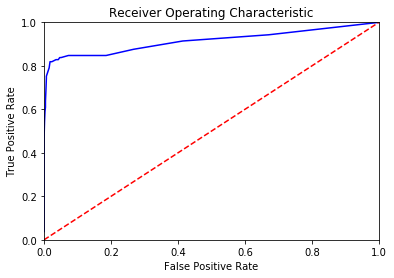

In [263]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
2,0.161841,Day Mins
6,0.123094,CustServ Calls
10,0.107422,Day Charge
3,0.080210,Eve Mins
7,0.074906,Int'l Plan


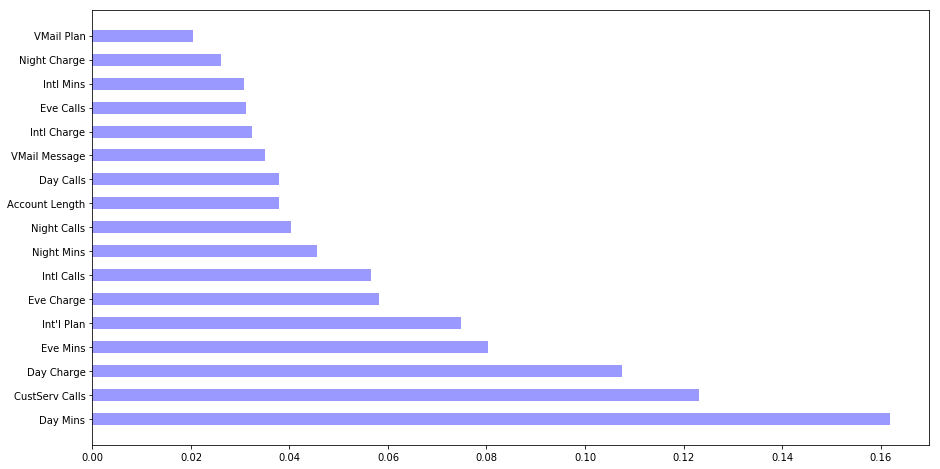

In [264]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(rfc.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(rfc.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [265]:
y_test["prob_true"] = probs[:, 1]
df_risky = df_test[y_test["prob_true"] > 0.9]
display(df_risky.head(5)[["prob_true"]])

,prob_true
2096,0.866667
54,0.900000
893,0.933333
47,0.966667
1365,1.000000
